In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x962de6d710>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

# Exploratory Climate Analysis

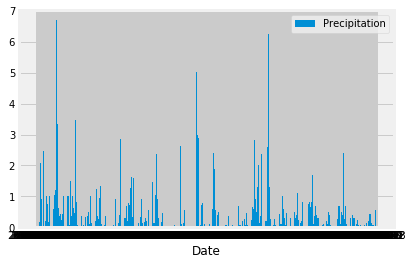

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
dateSplit = last_date[0].split("-")
query_date = dt.date(int(dateSplit[0]), int(dateSplit[1]), int(dateSplit[2])) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
sqldata = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= query_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
date = [date[0] for date in sqldata]
precip = [precip[1] for precip in sqldata]
data = pd.DataFrame({"Date": date,"Precipitation":precip})

# Sort the dataframe by date
data = data.set_index('Date').sort_index()
data = data.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.bar(data.index.values, data['Precipitation'], label = "Precipitation")
ax.set_xlabel("Date")
ax.legend()

![precipitation](Images/precipitation.png)

In [79]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [81]:
firstStat = session.query(Station).first()
firstStat.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xff02441b70>,
 'latitude': 21.2716,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0}

In [90]:
# Design a query to show how many stations are available in this dataset?
statsSQL = session.query(Station.station)
stations = [station[0] for station in statsSQL]
len(stations)

9

In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
statSum = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by((func.count(Measurement.station)).desc())
stations = [station[0] for station in statSum]
countStat = [counts[1] for counts in statSum]
statSum = pd.DataFrame({"Station":stations, "Count":countStat})
statSum

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
tempSum = session.query(Measurement.station, func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").group_by(Measurement.station)
stations = [station[0] for station in tempSum]
mini = [minimum[1] for minimum in tempSum]
avg = [avg[2] for avg in tempSum]
maxi = [maxi[3] for maxi in tempSum]
(mini, maxi, avg)

[(54.0, 85.0, 71.66378066378067)]

Text(0.5,1,'Tempurature at USC00519281')

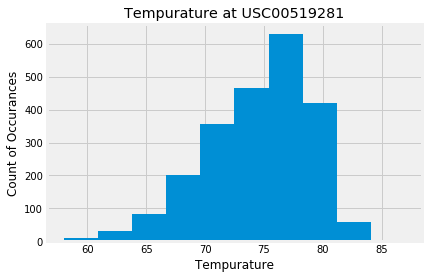

In [51]:
last_date = session.query(Measurement.date).filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()
dateSplit = last_date[0].split("-")
query_date = dt.date(int(dateSplit[0]), int(dateSplit[1]), int(dateSplit[2])) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
sqldata = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= query_date)

temp = [temp[1] for temp in sqldata]


# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.hist(temp)
ax.set_xlabel("Tempurature")
ax.set_ylabel("Count of Occurances")
ax.set_title("Tempurature at USC00519281")


In [52]:
last_date

('2017-08-18')

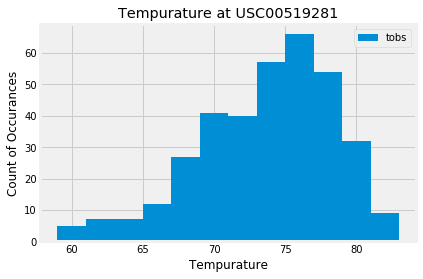

In [46]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = session.query(Measurement.date).filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()
dateSplit = last_date[0].split("-")
query_date = dt.date(int(dateSplit[0]), int(dateSplit[1]), int(dateSplit[2])) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
sqldata = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= query_date).filter(Measurement.station == "USC00519281")

temp = [temp[1] for temp in sqldata]


# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.hist(temp, label = "tobs", bins = 12)
ax.set_xlabel("Tempurature")
ax.set_ylabel("Count of Occurances")
ax.set_title("Tempurature at USC00519281")
ax.legend()

In [50]:
record = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).filter(Measurement.date >= query_date).first()
agg_dict = ({"MinTemp": str(record[0])}, {"AvgTemp": str(record[1])},{"MaxTemp":str(record[2])})
agg_dict

({'MinTemp': '58.0'}, {'AvgTemp': '74.63865546218487'}, {'MaxTemp': '87.0'})

![precipitation](Images/station-histogram.png)